<a href="https://colab.research.google.com/github/manojdavuluri/ML_Project/blob/main/StockPredicting_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
import pandas_datareader as pdr
key="015ba1630fe2e3389bb3192c5d007032f755a8f6"

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-12-24 00:00:00+00:00,108.03,109.00,107.9500,109.00,13596680,25.018514,25.243155,24.999987,25.243155,54386720,0.0,1.0
1,AAPL,2015-12-28 00:00:00+00:00,106.82,107.69,106.1807,107.59,26704210,24.738292,24.939774,24.590238,24.916616,106816840,0.0,1.0
2,AAPL,2015-12-29 00:00:00+00:00,108.74,109.43,106.8600,106.96,30931243,25.182942,25.342738,24.747556,24.770715,123724972,0.0,1.0
3,AAPL,2015-12-30 00:00:00+00:00,107.32,108.70,107.1800,108.58,25213777,24.854087,25.173679,24.821664,25.145888,100855108,0.0,1.0
4,AAPL,2015-12-31 00:00:00+00:00,105.26,107.03,104.8200,107.01,40912316,24.377014,24.786926,24.275115,24.782294,163649264,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-12-15 00:00:00+00:00,127.880,127.90,124.130,124.34,157572262,127.880,127.90,124.130,124.34,157572262,0.0,1.0
1253,AAPL,2020-12-16 00:00:00+00:00,127.810,128.37,126.560,127.41,98208591,127.810,128.37,126.560,127.41,98208591,0.0,1.0
1254,AAPL,2020-12-17 00:00:00+00:00,128.700,129.58,128.045,128.90,94359811,128.700,129.58,128.045,128.90,94359811,0.0,1.0
1255,AAPL,2020-12-18 00:00:00+00:00,126.655,129.10,126.120,128.96,192541496,126.655,129.10,126.120,128.96,192541496,0.0,1.0
1256,AAPL,2020-12-21 00:00:00+00:00,128.230,128.31,123.449,125.02,115085269,128.230,128.31,123.449,125.02,115085269,0.0,1.0


In [9]:
df1=df.reset_index()['close']

In [10]:
df1

0       108.030
1       106.820
2       108.740
3       107.320
4       105.260
         ...   
1252    127.880
1253    127.810
1254    128.700
1255    126.655
1256    128.230
Name: close, Length: 1257, dtype: float64

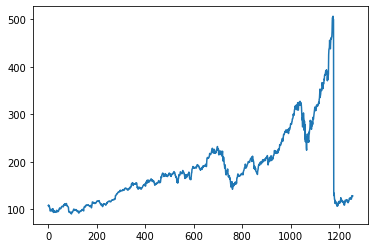

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [13]:
import numpy as np

In [14]:
df1

0       108.030
1       106.820
2       108.740
3       107.320
4       105.260
         ...   
1252    127.880
1253    127.810
1254    128.700
1255    126.655
1256    128.230
Name: close, Length: 1257, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1.shape)

(1257, 1)


In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(817, 440)

In [19]:
train_data

array([[0.04254961],
       [0.03963921],
       [0.04425737],
       [0.04084185],
       [0.03588695],
       [0.03610343],
       [0.02975346],
       [0.02491882],
       [0.01469633],
       [0.01592303],
       [0.01969934],
       [0.02313891],
       [0.01695731],
       [0.02208058],
       [0.01633193],
       [0.01520144],
       [0.01551413],
       [0.01433554],
       [0.02665063],
       [0.02188815],
       [0.02321106],
       [0.0074083 ],
       [0.00901984],
       [0.01683704],
       [0.01464823],
       [0.00995791],
       [0.0144558 ],
       [0.01505713],
       [0.00885147],
       [0.01123271],
       [0.01118461],
       [0.0094528 ],
       [0.00808178],
       [0.00877931],
       [0.01515334],
       [0.01871317],
       [0.01423933],
       [0.01371016],
       [0.01573061],
       [0.01046302],
       [0.01385448],
       [0.01544197],
       [0.01580277],
       [0.0152736 ],
       [0.02450992],
       [0.02503909],
       [0.02684305],
       [0.030

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 131ms/step - loss: 0.0111 - val_loss: 0.0543
Epoch 2/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0022 - val_loss: 0.0240
Epoch 3/100
12/12 [==============================] - 0s 18ms/step - loss: 5.9976e-04 - val_loss: 0.0222
Epoch 4/100
12/12 [==============================] - 0s 18ms/step - loss: 4.1172e-04 - val_loss: 0.0208
Epoch 5/100
12/12 [==============================] - 0s 20ms/step - loss: 3.9668e-04 - val_loss: 0.0209
Epoch 6/100
12/12 [==============================] - 0s 21ms/step - loss: 3.6549e-04 - val_loss: 0.0204
Epoch 7/100
12/12 [==============================] - 0s 21ms/step - loss: 3.8878e-04 - val_loss: 0.0193
Epoch 8/100
12/12 [==============================] - 0s 21ms/step - loss: 3.4242e-04 - val_loss: 0.0188
Epoch 9/100
12/12 [==============================] - 0s 20ms/step - loss: 3.5059e-04 - val_loss: 0.0184
Epoch 10/100
12/12 [==============================] - 0s 19ms/step - l

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.4.0'

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

159.06871909369067

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

281.461716115171

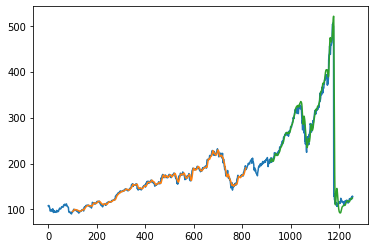

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

440

In [38]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.830811785929044,
 0.8378111846061336,
 0.841635598316296,
 0.8785808779314492,
 0.8517378232110644,
 0.8672760072158752,
 0.8350210463018641,
 0.8699939867708961,
 0.8892363199037885,
 0.8882501503307276,
 0.8853638003607938,
 0.89455201443175,
 0.8959470835838845,
 0.9206494287432352,
 0.9792904389657247,
 0.9936019242333134,
 0.9836680697534577,
 1.0,
 0.9854479855682503,
 0.983499699338545,
 0.09308478653036678,
 0.10544798556825014,
 0.09876127480457003,
 0.07345760673481655,
 0.07365003006614551,
 0.05407095610342749,
 0.06489476849067943,
 0.055682501503307225,
 0.052098616957306054,
 0.0601683704149128,
 0.06061334936861096,
 0.05241130487071555,
 0.04810583283223091,
 0.03968731208659049,
 0.04748045700541187,
 0.05164161154539987,
 0.04036079374624174,
 0.04300661455201443,
 0.05277209861695731,
 0.05921828021647624,
 0.05712567648827421,
 0.06126277811184605,
 0.06361996392062536,
 0.05455201443174984,
 0.062922429344558,
 0.05488875526157544,
 0.059506915213469624,
 0.059

In [41]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        n_steps=100
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        n_steps=99
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
    

print(lst_output)

[0.08690903]
100
[0.08690903]
101
2 day input [0.83781118 0.8416356  0.87858088 0.85173782 0.86727601 0.83502105
 0.86999399 0.88923632 0.88825015 0.8853638  0.89455201 0.89594708
 0.92064943 0.97929044 0.99360192 0.98366807 1.         0.98544799
 0.9834997  0.09308479 0.10544799 0.09876127 0.07345761 0.07365003
 0.05407096 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335
 0.0524113  0.04810583 0.03968731 0.04748046 0.05164161 0.04036079
 0.04300661 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996
 0.05455201 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292
 0.08192423 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168
 0.06535177 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296
 0.05017438 0.06008419 0.044546   0.04432952 0.04834636 0.05919423
 0.06900782 0.06819002 0.06248948 0.06164762 0.07011425 0.06944077
 0.06956103 0.07206254 0.06987372 0.06660253 0.06806975 0.06494287
 0.05654841 0.05972339 0.06179194 0.06313891 0.06905592 0.07788334
 0.07874925 0.07

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(df1)

1257

In [45]:
df3=df1.tolist()
df3.extend(lst_output)

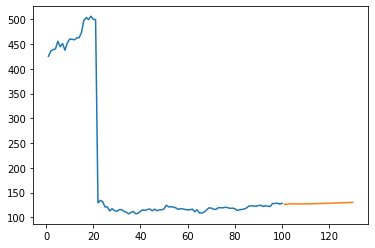

In [46]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

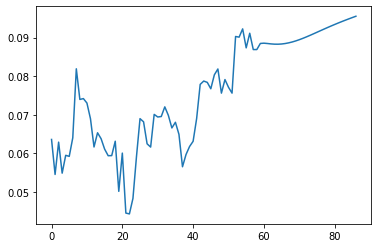

In [47]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [48]:
df3=scaler.inverse_transform(df3).tolist()

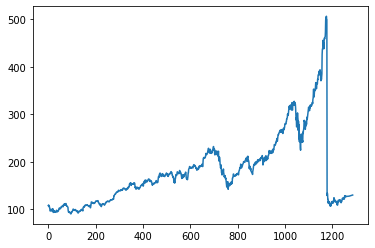

In [49]:
plt.plot(df3)